# <center> FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO <br> Y RECONOCIMIENTO DE PATRONES</center>
## <center> 1er parcial, 2021</center>           

La duración del parcial es de 3 horas. El parcial consta de 2 ejercicios, cuya suma total es de 100 puntos. El parcial es sin material y no está permitido acceder a Internet. Ante cualquier duda comuníquese con los docentes. 

Este notebook corresponde al **ejercicio 2**. Hay un notebook por ejercicio planteado.

* [Ejercicio 2 - Compromiso Sesgo Varianza](#Ejercicio2) (40 puntos)

# Importar bibliotecas

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from fuaa_utils_ej2 import validar_resultado
from fuaa_utils_ej2 import visualizar_experimentos_modelo_lineal
from fuaa_utils_ej2 import mostrar_experimento
from fuaa_utils_ej2 import identificar_parcial

%matplotlib inline

identificar_parcial()

Usuario julian.o.flaherty en pcunix148.fing.edu.uy.


# Ejercicio 2

## Compromiso Sesgo Varianza

El error fuera de la muestra se define como 

$$
E_{out}\left(g^{(\mathcal{D})}\right)=\mathtt{E}_{\mathbf{x}}\left[ \left(g^{\mathcal{D}}(\mathbf{x}) - f(\mathbf{x})\right)^2 \right],
$$

donde $\mathtt{E}_{\mathbf{x}}$ denota el valor esperado respecto a $\mathbf{x} \in \mathcal{X}$ y la esperanza se toma</font> sobre la distribución de probabilidad del espacio de entrada $\mathcal{X}$. En la expresión anterior se hizo explícita la dependencia de la hipótesis final $g$ respecto a los datos $\mathcal{D}$ ya que tomar en cuenta esa dependencia es medular para el análisis sesgo-varianza. Para obtener un resultado que sea independiente del conjunto de datos utilizado para obtener $g$ es necesario tomar la esperanza respecto a todos los posibles conjuntos de datos, es decir 

\begin{align}
\mathtt{E}_{\mathcal{D}} \left[ E_{out}\left(g^{(\mathcal{D})}\right) \right] & = \mathtt{E}_{\mathcal{D}} \left[ \mathtt{E}_{\mathbf{x}}\left[ \left(g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2 \right]\right]  \\ 
& = \mathtt{E}_{\mathbf{x}} \left[\mathtt{E}_{\mathcal{D}}  \left[ \left(g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2 \right]\right] \\
\end{align}

### Parte a)

Se define $\bar{g}(\mathbf{x}) =  \mathtt{E}_{\mathcal{D}}\left[ g^{\mathcal{(D)}}(\mathbf{x})\right]$. ¿Cómo puede interpretarse $\bar{g}(\mathbf{x})$ ? 

**Respuesta:**

Es el valor esperado que tomara nuestro modelo g si se lo entrena sobre todos los datasets posibles. Se la podría ver como el entrenamiento promedio de g, es decir, entrenar el mismo modelo sobre distintos datos y promediar los pesos obtenidos.

### Parte b) 

Si se definen: 

$$ 
bias(\mathbf{x})=(\bar{g}(\mathbf{x})-f(\mathbf{x}))^2
$$

$$ 
var(\mathbf{x})=\mathtt{E}_{\mathcal{D}}\left[ (g^{\mathcal{(D)}}(\mathbf{x}) - \bar{g}(\mathbf{x}))^2 \right]
$$


Mostrar que 

\begin{align}
\mathtt{E}_{\mathcal{D}} \left[ \mathtt{E}_{out}(g^{(\mathcal{D})}) \right] & = \mathtt{E}_{\mathbf{x}} \left[ bias(\mathbf{x}) + var(\mathbf{x})  \right]  \\
& = bias + var, \\
\end{align}

donde $bias=\mathtt{E}_{\mathbf{x}} \left[ bias(\mathbf{x}) \right]$ y $var=\mathtt{E}_{\mathbf{x}} \left[ var(\mathbf{x}) \right]$

*Sugerencia:* puede resultar útil sumar y restar $\bar{g}$ en $\mathtt{E}_{\mathcal{D}}  \left[ \left(g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2 \right]$.

**Respuesta:**

$$ \mathtt{E}_{\mathcal{D}} \left[ \mathtt{E}_{out}(g^{(\mathcal{D})}) \right] =  \mathtt{E}_{\mathbf{x}} \left[\mathtt{E}_{\mathcal{D}}  \left[ \left(g^{(\mathcal{D})}(\mathbf{x}) - f(\mathbf{x})\right)^2 \right]\right] = \mathtt{E}_{\mathbf{x}} \left[\mathtt{E}_{\mathcal{D}}  \left[ \left(g^{(\mathcal{D})}(\mathbf{x}) - \bar{g}(\mathbf{x}) + \bar{g}(\mathbf{x})- f(\mathbf{x})\right)^2 \right]\right]$$

$$ \mathtt{E}_{\mathcal{D}} \left[ \mathtt{E}_{out}(g^{(\mathcal{D})}) \right] =  \mathtt{E}_{\mathbf{x}} \left[\mathtt{E}_{\mathcal{D}}  \left[ \left(g^{(\mathcal{D})}(\mathbf{x}) - \bar{g}\right)^2\right]\right] + \mathtt{E}_{\mathbf{x}} \left[\mathtt{E}_{\mathcal{D}}  \left[ \left(\bar{g}(\mathbf{x})- f(\mathbf{x})\right)^2\right]\right] + 2\mathtt{E}_{\mathbf{x}}\left[(\bar{g}(x)-f(x))\left(\mathtt{E}_{\mathcal{D}}\left[g^{(\mathcal{D})}\right] - \bar{g}(x)\right)\right] $$

$$ \mathtt{E}_{\mathcal{D}} \left[ \mathtt{E}_{out}(g^{(\mathcal{D})}) \right] =  \mathtt{E}_{\mathbf{x}} \left[var(x)\right] + \mathtt{E}_{\mathbf{x}} \left[bias(x)\right] + 2\mathtt{E}_{\mathbf{x}}\left[(\bar{g}(x)-f(x))\left(\bar{g}(x) - \bar{g}(x)\right)\right] $$

$$ \mathtt{E}_{\mathcal{D}} \left[ \mathtt{E}_{out}(g^{(\mathcal{D})}) \right] =\mathtt{E}_{\mathbf{x}} \left[bias(x) + var(x)\right] = bias + var $$


## Un primer experimento 

Se considera la función $f(x)=\sin(\pi x)$ y un conjunto de datos de tamaño $N=2$. Se propone encontrar la mejor hipótesis $g$ utilizando los puntos $(x_1,y_1)$ y $(x_2,y_2)$, para cada uno de los siguientes conjuntos de hipótesis:

\begin{align}
\mathcal{H}_0: & \text{ Conjunto de todas las líneas de la forma } h(x)=b  \\
\mathcal{H}_1: & \text{ Conjunto de todas las líneas de la forma } h(x)=ax + b
\end{align}

Para $\mathcal{H}_0$  se considera como hipótesis que mejor se ajusta a los datos a $b=\frac{y_1+y_2}{2}$. Para $\mathcal{H}_1$ se considera la recta que pasa por los puntos $(x_1,y_1)$ y $(x_2,y_2)$.

### Parte c)
Completar la función `obtener_hipotesis()`. Dicha función estima la mejor hipótesis utilizando solamente dos puntos para $K$ experimentos diferentes. El conjunto de hipótesis a utilizar se pasa como parámetro al igual que la lista de puntos. 

In [4]:
def obtener_hipotesis(x1, y1, x2, y2, hipotesis):
    '''
    Entrada:
        x1: arreglo de largo (K,) con las coordenadas en x de los puntos1 de K experimentos
        y1: arreglo de largo (K,) con las coordenadas en y de los puntos1 de K experimentos
        x2: arreglo de largo (K,) con las coordenadas en x de los puntos2 de K experimentos
        y2: arreglo de largo (K,) con las coordenadas en y de los puntos2 de K experimentos
        hipotesis: conjunto de hipótesis a utilizar para estimar los parámetros. Puede valer 'H0' o 'H1'
    Salida:
        a: arreglo de largo (K,) con los valores de a calculados para cada par (puntos1, puntos2)
        b: arreglo de largo (K,) con los valores de b calculados para cada par (puntos1, puntos2)
    '''

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################
    K = x1.shape[0]
    a = np.zeros(K)
    b = np.zeros(K)
    
    if hipotesis == 'H0':
        b = (y1+y2)/2
    elif hipotesis == 'H1':
        a = (y1 - y2)/(x1 - x2)
        b = (x1 * y2 - x2 * y1) / (x1 - x2)
    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################

    return a, b

In [5]:
# Validar la función obtener_hipotesis().
validar_resultado("obtener_hipotesis", funcion=obtener_hipotesis)

+-------------------------------------------------------------------------+
|               FuAA (1er. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Parámetros 'a' con H0 validados.
 Parámetros 'b' con H0 validados.
 Parámetros 'a' con H1 validados.
 Parámetros 'b' con H1 validados.
+-------------------------------------------------------------------------+


### Parte d)

Completar la función `calcular_sesgo_varianza()`. Dicha función estima el sesgo y la varianza al aproximar la función $\sin(\pi x)$ utilizando las hipótesis obtenidas en $K$ experimentos diferentes y un conjunto de test. Tomar en cuenta que si se obtienen $g_1, \ldots , g_K $ hipótesis finales luego de aplicar el mismo algoritmo de aprendizaje sobre  $\mathcal{D}_1, \ldots, \mathcal{D}_K$ conjuntos de datos distintos, es razonable estimar $\bar{g}(\mathbf{x})$ como

$$
\bar{g}(\mathbf{x}) = \frac{1}{K} \sum_{k=1}^{K} g_k(\mathbf{x})
$$

In [188]:
def calcular_sesgo_varianza(x_test, a, b):
    '''
    Estima el sesgo y la varianza al aproximar la función sin(\pi x) utilizando 
    las hipótesis obtenidas en 𝐾 experimentos diferentes y un conjunto de test.
    Entrada: 
        x_test: arreglo de tamaño (N_test,) a utilizar como conjunto de test
        a: arreglo de tamaño (K,) con coeficientes a de K experimentos
        b: arreglo de tamaño (K,) con coeficientes b de K experimentos
    Salida:
        sesgo: 
        varianza:
    '''
    
    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################
    
    g_techo = np.average(a)*x_test + np.average(b)
    
    sesgo = np.average(((np.sin(np.pi*x_test) - g_techo)**2))
    
    func = np.zeros((a.shape[0], x_test.shape[0]))
    for i in range(a.shape[0]):
        func[i] = (a[i]*x_test + b[i] - g_techo)**2

    varianza = np.average(np.average(func, axis=0))
    
    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################
    
    return sesgo, varianza

In [189]:
# Validar la función calcular_sesgo_varianza().
validar_resultado("calcular_sesgo_varianza", funcion=calcular_sesgo_varianza)

+-------------------------------------------------------------------------+
|               FuAA (1er. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Implementación de cálculo del sesgo: resultado validado.
 La 'varianza' calculado no es correcto.
+-------------------------------------------------------------------------+


### Parte e)

Ejecutar la siguiente celda y a partir de lo obsevado indique cuál de los modelos prefiere en términos del error esperado fuera de la muestra. Comente además qué representan las curvas amarilla y azul.

Para H0: sesgo=0.502367,  varianza=0.250006
Para H1: sesgo=0.203066,  varianza=1.636556


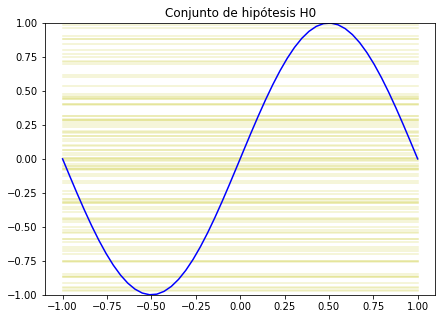

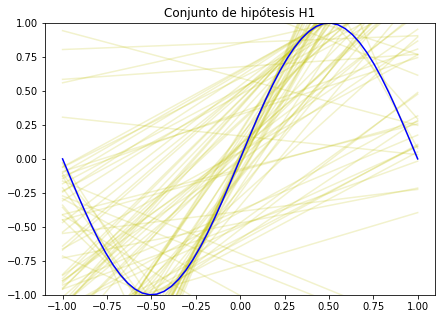

In [190]:
def realizar_experimentos(K):
    '''
    Se realizan K experimentos y se estima el sesgo y la varianza de 
    los conjuntos H0 y H1 al aproximar sin(\pi x) en el intervalo [-1,1] 
    con dos puntos
    '''

    # Se sortean aleatoriamente K pares (x1,y1) y K pares (x2,y2)
    x1 = 2 * np.random.rand(K) - 1
    x2 = 2 * np.random.rand(K) - 1
    y1 = np.sin(np.pi * x1)
    y2 = np.sin(np.pi * x2)

    # Se encuentran los coef a y b del modelo H0
    a0, b0 = obtener_hipotesis(x1, y1, x2, y2, 'H0')
    mostrar_experimento(a0, b0, 'Conjunto de hipótesis H0')

    # Se encuentran los coef a y b del modelo H1
    a1, b1 = obtener_hipotesis(x1, y1, x2, y2, 'H1')
    mostrar_experimento(a1, b1, 'Conjunto de hipótesis H1')

    # Se define el conjunto de test
    N_test = 1000
    x_test = 2 * np.random.rand(N_test) - 1

    bias0, variance0 = calcular_sesgo_varianza(x_test, a0, b0)
    print('Para H0: sesgo=%f,  varianza=%f' % (bias0, variance0))

    bias1, variance1 = calcular_sesgo_varianza(x_test, a1, b1)
    print('Para H1: sesgo=%f,  varianza=%f' % (bias1, variance1))


# Se realizan K=10000 experimentos.
realizar_experimentos(10000)

**Respuesta:**    

Aunque la validación devuelve que la varianza es incorrecta, el resultado obtenido tiene coherencia con lo esperado.

Para la hipotesis simple, el sesgo es mayor y la varianza es menor.

Para la hipotesis mas compleja, el sesgo es menor a cost de una varianza mayor.

A la hora de elegir uno de los modelos, un menor sesgo se traduce en un menor error, pero las se necesitan muchas más muestras para que el error fuera de muestra se asemeje al error dentro de la muestra. Es por eso que si se tienen pocas muestras se use la hipotesis más simple ($\mathcal{H}_0$)

## Un segundo experimento 

Este experimento es similar al anterior, con las siguientes diferencias:

* Se considera solamente el conjunto de hipótesis $\mathcal{H}_1$.
* En vez de utilizar un número fijo de puntos ($N=2$) para encontrar los parámetros del modelo lineal, se analiza el comportamiento del sesgo y la varianza al variar el número de puntos que se sortean.
* Se contempla la posibilidad de aplicar regularización.

El modelo lineal óptimo que se encontrará es aquel que minimiza el error cuadrático medio regularizado mediante la regularización de Ridge. 

$$
\begin{align}
E_{aug} & = E_{mse} + E_{reg}   \\
E_{aug}(\mathbf{w}) & =\sum_{n=1}^N \left(y_n - \mathbf{w}^{\intercal}\mathbf{x}_n\right)^2 + \lambda \sum_{k=1}^d w_k^2
\tag{1}
\end{align}
$$

Observar que la sumatoria en el término correspondiente a la regularización comienza en $k=1$ y por lo tanto **no** se regulariza el término de *bias*. 

A continuación se implementan funciones que serán de utilidad al realizar el experimento.

### Parte f)

Implemente el método `regresion_lineal()`. Dicho método encuentra la solución que minimiza la ecuación (1) sin tomar en cuenta el término correspondiente a la regularización ($\lambda=0$).

In [171]:
def regresion_lineal(X, y):
    '''
    Entrada:
        X: arreglo de tamaño (N,d+1)
        y: arreglo de tamaño (N,)
    Salida:
        w: arreglo unidimensional con los pesos encontrados por la regresión lineal
    '''

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################

    X_dag = np.linalg.inv(X.T @ X) @ X.T
    
    w = X_dag @ y

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return w

In [172]:
# Validar la función regresion_lineal().
validar_resultado('regresion_lineal', funcion=regresion_lineal)

+-------------------------------------------------------------------------+
|               FuAA (1er. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Implementación de la regresión lineal: resultado validado.
+-------------------------------------------------------------------------+


### Parte g)

Implemente el método `regresion_lineal_con_regularización()`. Este método encuentra la solución que minimiza la ecaución (1). Se recuerda que cuando se regularizan todos los términos del vector de pesos $\mathbf{w}$,  dicha optimización tiene una solución cerrada dada por:

$$
\mathbf{w}_{opt}=(\mathbf{X}^{\intercal}\mathbf{X}+\lambda I)^{-1}\mathbf{X}^{\intercal}\mathbf{y}
$$

siendo $\mathbf{X}$ una matriz que en cada fila tiene una muestra expresada en coordenadas homogéneas. 

In [154]:
def regresion_lineal_con_regularizacion(X, y, reg_factor=0):
    '''
    Implementa la solución cerrada de la regresión con regularización de Ridge.
    No se regulariza el término correspondiente al bias.
    
    Entrada:
        X: arreglo de tamaño (N,d+1)
        y: arreglo de tamaño (N,)
        reg_factor: coeficiente que multiplica al término de regularización.

    Salida:
        w_reg: arreglo unidimensional con los pesos encontrados por la regresión lineal 
               con regularización de Ridge.
    '''

    reg_matrix = np.eye(X.shape[1])
    reg_matrix[0, 0] = 0  # no se regulariza el bias

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################

    X_dag_reg = np.linalg.inv(X.T @ X + reg_factor * reg_matrix) @ X.T
    
    w = X_dag_reg @ y
    
    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################

    return w

In [155]:
# Validar la función regresion_Ridge()
validar_resultado('regresion_Ridge', funcion=regresion_lineal_con_regularizacion)

+-------------------------------------------------------------------------+
|               FuAA (1er. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Implementación de la regresión lineal regularizada: resultado validado.
+-------------------------------------------------------------------------+


### Parte h)

Implementar el método `mse()` que calcula el error cuadrático medio entre los valores reales y los valores estimados por un modelo lineal.

In [156]:
def mse(X, w, y):
    '''
    Calcula el error cuadrático medio entre los valores reales y los valores estimados por un 
    modelo lineal.
    
    Entrada:
        X: arreglo de tamaño (N, d+1) que contiene N muestras de dimensión d expresadas en 
           coordenadas homogéneas.
        w: arreglo de tamaño (d+1,) con los parámetros de un modelo lineal.
        y: arreglo de tamaño (N) con los valores obtenidos al aplicar la función objetivo 
           sobre las muestras en X.
    Salida:
        mse: error cuadrático medio entre los valores estimados por el modelo y los valores reales
    '''

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################

    mse = np.average((y - X@w)**2)

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CÓDIGO #######
    #####################################################

    return mse

In [157]:
# Validar la función mse().
validar_resultado("mse", funcion=mse)

+-------------------------------------------------------------------------+
|               FuAA (1er. parcial 2021): validar resultado               |
+-------------------------------------------------------------------------+
 Implementación de mse(): resultado validado.
+-------------------------------------------------------------------------+


### Parte i)

Complete la implementación del método `realizar_experimentos_modelo_lineal()`. Para ello le resultarán útiles las implementaciones: `regresion_lineal()`, `regresion_lineal_con_regularizacion()` y `mse()`. Lea con atención la descripción del método y de las partes a completar.

In [196]:
def realizar_experimentos_modelo_lineal(N_max=10,
                                        K=1000,
                                        reg_factor=0.1,
                                        mostrar2=False):
    '''
    Estima el sesgo y la varianza al aproximar la función sin(\pi x) en el intervalo [-1,1] 
    en función del número de puntos que se utilizan para encontrar los parámetros del modelo. 
    El número de puntos a utilizar varía de 2 a N_max. Para cada número de puntos a considerar
    se estimará el sesgo y la varianza mediante la realización de K experimentos. Por defecto 
    se muestran los resultados obtenidos con un modelo sin regularizar y con un modelo 
    regularizado con lambda = reg_factor.
    
    Entrada: 
        N_max: Máximo número de puntos a considerar por experimento. Los puntos son sorteados 
               aleatoriamente en el intervalo [-1,1]  
        K: Cantidad de experimentos a realizar para cada número de puntos considerado.
        reg_factor: factor de regularización utilizado en el modelo regularizado.
        mostrar2: Opción de visualización que permite elegir entre mostrar los resultados 
                  obtenidos regularizando y sin regularizar o solo regularizando. Por defecto 
                  se muestra solo el regularizado (mostrar2=False).    
    '''

    # Se define el conjunto de test.
    N_test = 1000
    x_test = 2 * np.random.rand(N_test) - 1
    X_test = np.ones((N_test, 2))
    X_test[:, 1] = x_test
    y_test = np.sin(np.pi * x_test)

    # Se inicializan las listas que almacenan sesgos, varianzas y los errores
    # de clasificación para la regresión lineal sin y con regularización.
    lista_sesgos = []
    lista_varianzas = []
    lista_Ein = []
    lista_Eout = []

    lista_varianzas_modelo_regularizado = []
    lista_sesgos_modelo_regularizado = []
    lista_Ein_modelo_regularizado = []
    lista_Eout_modelo_regularizado = []

    # para cada N se estimará el sesgo y la varianza utilizando el resultado de K experimentos
    for N in range(2, N_max):

        # Se inicializan los valores de a y b para el modelo regularizado y sin regularizar
        a = np.zeros(K)
        b = np.zeros(K)  # Modelo sin regularizar
        a_reg = np.zeros(K)
        b_reg = np.zeros(K)  # Modelo regularizado

        # Se inicializan los valores de Ein y Eout para el modelo regularizado y sin regularizar
        Ein = np.zeros(K)
        Eout = np.zeros(K)  # Modelo sin regularizar
        Ein_reg = np.zeros(K)
        Eout_reg = np.zeros(K)  # Modelo regularizado

        for k in range(K):  # Para cada experimento

            #####################################################
            ####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO #######
            #####################################################

            # Se sortean N puntos y se obtienen sus correspondientes valores de y.
            x = 2 * np.random.rand(N) - 1
            X = np.ones((N,2))
            X[:, 1] = x
            y = np.sin(np.pi * x)

            # Se obtienen los a[k], b[k] para el modelo lineal sin regularización.
            w = regresion_lineal(X, y)
            a[k]= w[1]
            b[k]= w[0]

            # Se estiman los errores de regresión (mse) dentro y fuera de la muestra para el
            # modelo sin regularización.
            Ein[k] = mse(X, w, y)
            Eout[k] = mse(X_test, w, y_test)

            # Se obtienen los a[k], b[k]  para el modelo lineal con regularización.
            w = regresion_lineal_con_regularizacion(X, y, reg_factor=reg_factor)
            a_reg[k]= w[1]
            b_reg[k]= w[0]

            # Se estiman los errores de regresión (mse) dentro y fuera de la muestra para el
            # modelo con regularización.
            Ein_reg[k] = mse(X, w, y)
            Eout_reg[k] = mse(X_test, w, y_test)

            #####################################################
            ####### TERMINA ESPACIO PARA COMPLETAR CÓDIGO #######
            #####################################################

        # Se calculan el sesgo y la varianza para ambos modelos.
        sesgo_n, varianza_n = calcular_sesgo_varianza(x_test, a, b)
        sesgo_reg_n, varianza_reg_n = calcular_sesgo_varianza(x_test, a_reg, b_reg)

        # Se guardan los valores de sesgo, varianza y errores de clasificación de este
        # experimento en la listas.
        lista_sesgos.append(sesgo_n)
        lista_varianzas.append(varianza_n)
        lista_Ein.append(Ein.mean())
        lista_Ein_modelo_regularizado.append(Ein_reg.mean())
        lista_sesgos_modelo_regularizado.append(sesgo_reg_n)
        lista_varianzas_modelo_regularizado.append(varianza_reg_n)
        lista_Eout.append(Eout.mean())
        lista_Eout_modelo_regularizado.append(Eout_reg.mean())

    # Visualización de la evolución de los parámetros con el número de puntos.
    visualizar_experimentos_modelo_lineal(N_max, K, reg_factor, lista_sesgos, 
        lista_varianzas, lista_Ein, lista_Ein_modelo_regularizado, 
        lista_sesgos_modelo_regularizado, lista_varianzas_modelo_regularizado, 
        lista_Eout, lista_Eout_modelo_regularizado, mostrar2)

Ejecute la siguiente celda y verifique que obtiene un comportamineto similar al que se muestra en la figura de más abajo utilizando como factor de regularización $\lambda=1$.

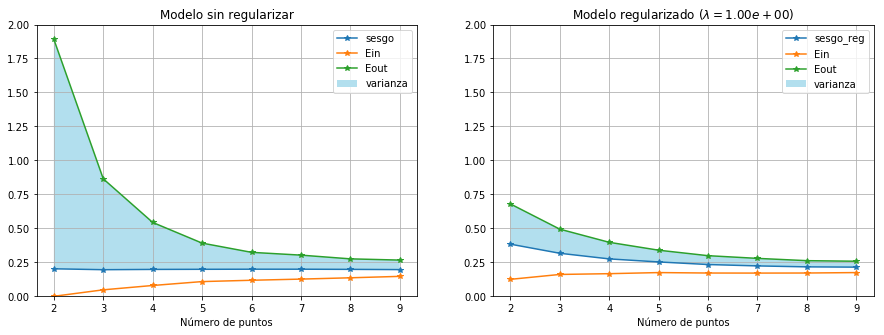

In [197]:
N_max = 10
num_exp = 1000
reg_factor = 1
realizar_experimentos_modelo_lineal(N_max, num_exp, reg_factor, mostrar2=True)

### Parte j) 

En esta parte asuma que en la parte anterior obtuvo un resultado similar al que se muestra en la siguiente figura.

![Experimento variando N](imgs/resultado_variandoN.png) 

En el caso que se utilizan sólamente dos puntos para estimar los parámetros del modelo lineal, ¿cambia en algo la decisión de la **parte (e)** el hecho que sea posible regularizar el modelo? Justifique.

**Respuesta**

Sí. Observando que la regularización disminuye drásticamente $E_{out}$ tiene sentido optar por la hipotesis de menor sesgo y regularizar para minimizar el error fuera de muestra.

### Parte k) 

Para un número fijo de puntos utilizado en el experimento, por ejemplo $N=2$, evaluar cómo varían el sesgo, la varianza y el $E_{out}$ (aumentan o disminuyen) al incrementar el factor de regularización desde un valor muy chico a un valor muy grande. Comentar.

No pude hacer el código, pero lo esperado sería que mientras mayor la regularización menor sea la varianza y mayor sean el sesgo y el $E_{out}$, puesto que se esta restringiendo el modelo para hacelo más simple y evitar el overfitting. Esto en menor medida es deseable para disminuir la varianza, pero llega un punto donde regularizar mucho un modelo resulta en peores resultados overall.

ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

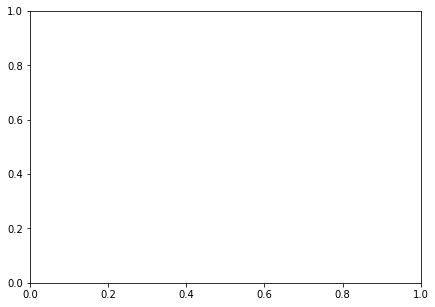

In [206]:
#####################################################
####### EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO #######
#####################################################

####################################################
####### TERMINA ESPACIO PARA COMPLETAR CÓDIGO #######
#####################################################

**Comentarios:** ...